<a href="https://colab.research.google.com/github/Vaycold/Python_DL/blob/main/LSTM_NLP/LSTM%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM을 활용해 주가 예측 모델 구현

    - 프로세스 파이프라인 구축

### Import Module & Load tock data

In [1]:
# Import module

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 

warnings.filterwarnings('ignore')

In [2]:
# FinanceDataReader import
# 이 패키지는 주가 데이터를 편리하게 가져올 수 있음
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr

In [4]:
# 삼성전자 주가를 불러와보자
# 삼성전자(005930) 전체(1996.11.05~ 현재)
samsung = fdr.DataReader('005930')
samsung.head()
# dataframe형태로 가져옴

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-27,1256,1265,1152,1224,99340,NaN
1997-06-28,1227,1250,1224,1251,36660,0.022059
1997-06-30,1259,1290,1254,1260,100240,0.007194
1997-07-01,1259,1286,1259,1269,167900,0.007143
1997-07-02,1277,1313,1277,1296,169940,0.021277


In [5]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-28,81700,82000,81600,81900,11578529,0.003676
2021-06-29,81900,82100,80800,81000,15744317,-0.010989
2021-06-30,81100,81400,80700,80700,13288643,-0.003704
2021-07-01,80500,80600,80000,80100,13382882,-0.007435
2021-07-02,80000,80400,79900,80000,8181692,-0.001248


In [6]:
samsung.describe()

,Open,High,Low,Close,Volume,Change
count,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,20730.173167,20954.542500,20505.031667,20755.953833,2.544814e+06,0.001027
std,18213.883595,18385.055374,18046.507131,18218.540457,6.283996e+06,0.025757
min,0.000000,0.000000,0.000000,627.000000,0.000000e+00,-0.137566
25%,7400.000000,7500.000000,7277.250000,7400.000000,2.749732e+05,-0.012231
50%,13730.000000,13900.000000,13570.000000,13760.000000,4.492690e+05,0.000000
75%,28000.000000,28220.000000,27670.000000,28000.000000,8.159305e+05,0.012965
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.150000


In [7]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1997-06-27 to 2021-07-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [8]:
# 애플데이터 가져오기
apple = fdr.DataReader('AAPL')
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,469030000.0,-0.9988
1980-12-15,0.12,0.12,0.12,0.12,175880000.0,-0.0769
1980-12-16,0.11,0.11,0.11,0.11,105730000.0,-0.0833
1980-12-17,0.12,0.12,0.12,0.12,86440000.0,0.0909
1980-12-18,0.12,0.12,0.12,0.12,73450000.0,0.0000


In [9]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-06-28,134.78,133.46,135.24,133.46,62110000.0,0.0125
2021-06-29,136.33,134.82,136.49,134.38,64560000.0,0.0115
2021-06-30,136.96,136.13,137.38,135.89,63260000.0,0.0046
2021-07-01,137.27,136.68,137.30,135.77,52490000.0,0.0023
2021-07-02,139.96,137.90,140.00,137.74,78950000.0,0.0196


In [10]:
# 특정 시점 이후 데이터 불러오기
apple = fdr.DataReader('AAPL', '2017')
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


In [11]:
# 포드 사 데이터
ford = fdr.DataReader('F', '1980-01-01','2019-12-30')
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.83,1.83,1.85,1.82,3770000.0,-0.0108
1980-03-19,1.85,1.85,1.86,1.83,1560000.0,0.0109
1980-03-20,1.86,1.86,1.88,1.85,1450000.0,0.0054
1980-03-21,1.78,1.78,1.85,1.76,5020000.0,-0.0430
1980-03-24,1.71,1.71,1.75,1.66,3330000.0,-0.0393


In [12]:
ford.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,9.44,9.50,9.57,9.40,54800000.0,-0.0042
2019-12-24,9.47,9.44,9.49,9.43,11880000.0,0.0032
2019-12-26,9.45,9.47,9.49,9.43,28980000.0,-0.0021
2019-12-27,9.36,9.45,9.46,9.35,28270000.0,-0.0095
2019-12-30,9.25,9.34,9.35,9.23,36090000.0,-0.0118


In [13]:
stock_code = '005930'
stock = fdr.DataReader(stock_code)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-27,1256,1265,1152,1224,99340,NaN
1997-06-28,1227,1250,1224,1251,36660,0.022059
1997-06-30,1259,1290,1254,1260,100240,0.007194
1997-07-01,1259,1286,1259,1269,167900,0.007143
1997-07-02,1277,1313,1277,1296,169940,0.021277


In [14]:
stock.index

DatetimeIndex(['1997-06-27', '1997-06-28', '1997-06-30', '1997-07-01',
               '1997-07-02', '1997-07-03', '1997-07-04', '1997-07-05',
               '1997-07-07', '1997-07-08',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

### 시각화

In [15]:
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [16]:
stock.index

DatetimeIndex(['1997-06-27', '1997-06-28', '1997-06-30', '1997-07-01',
               '1997-07-02', '1997-07-03', '1997-07-04', '1997-07-05',
               '1997-07-07', '1997-07-08',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [17]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [18]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-06-27,1256,1265,1152,1224,99340,NaN,1997,6,27
1997-06-28,1227,1250,1224,1251,36660,0.022059,1997,6,28
1997-06-30,1259,1290,1254,1260,100240,0.007194,1997,6,30
1997-07-01,1259,1286,1259,1269,167900,0.007143,1997,7,1
1997-07-02,1277,1313,1277,1296,169940,0.021277,1997,7,2


In [19]:
# 연도별 월별 피벗테이블

stock.groupby(['Year','Month']).mean()

Open          High  ...    Change        Day
Year Month                              ...                     
1997 6       1247.333333   1268.333333  ...  0.014627  28.333333
     7       1228.769231   1241.461538  ... -0.003107  15.884615
     8       1261.840000   1278.040000  ...  0.003438  15.840000
     9       1224.652174   1238.739130  ... -0.002450  15.086957
     10      1027.230769   1045.730769  ... -0.020538  16.576923
...                  ...           ...  ...       ...        ...
2021 3      82250.000000  82763.636364  ... -0.000570  16.318182
     4      83786.363636  84150.000000  ...  0.000101  16.045455
     5      80547.368421  81105.263158  ... -0.000592  16.684211
     6      81195.454545  81590.909091  ...  0.000147  15.318182
     7      80250.000000  80500.000000  ... -0.004342   1.500000

[290 rows x 7 columns]

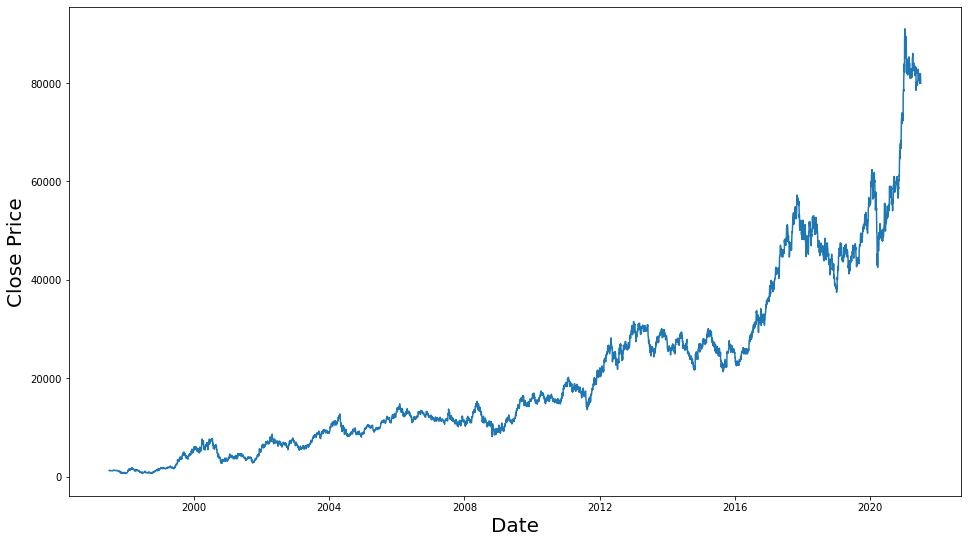

In [20]:
plt.figure(figsize=(16,9))

plt.plot(stock['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=20)
plt.show()

In [21]:
# 구간 별 나눠서 그려보기
time_steps = [['1990','2000'],
              ['2000','2010'],
              ['2010','2015'],
              ['2015','2020']
              
]
# 90년대 데이터
stock.loc[(stock.index >= time_steps[0][0]) & (stock.index < time_steps[0][1])]

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-06-27,1256,1265,1152,1224,99340,NaN,1997,6,27
1997-06-28,1227,1250,1224,1251,36660,0.022059,1997,6,28
1997-06-30,1259,1290,1254,1260,100240,0.007194,1997,6,30
1997-07-01,1259,1286,1259,1269,167900,0.007143,1997,7,1
1997-07-02,1277,1313,1277,1296,169940,0.021277,1997,7,2
...,...,...,...,...,...,...,...,...,...
1999-12-22,5140,5350,5060,5280,826858,0.047619,1999,12,22
1999-12-23,5280,5700,5240,5580,1057262,0.056818,1999,12,23
1999-12-24,5700,5720,5360,5460,708446,-0.021505,1999,12,24


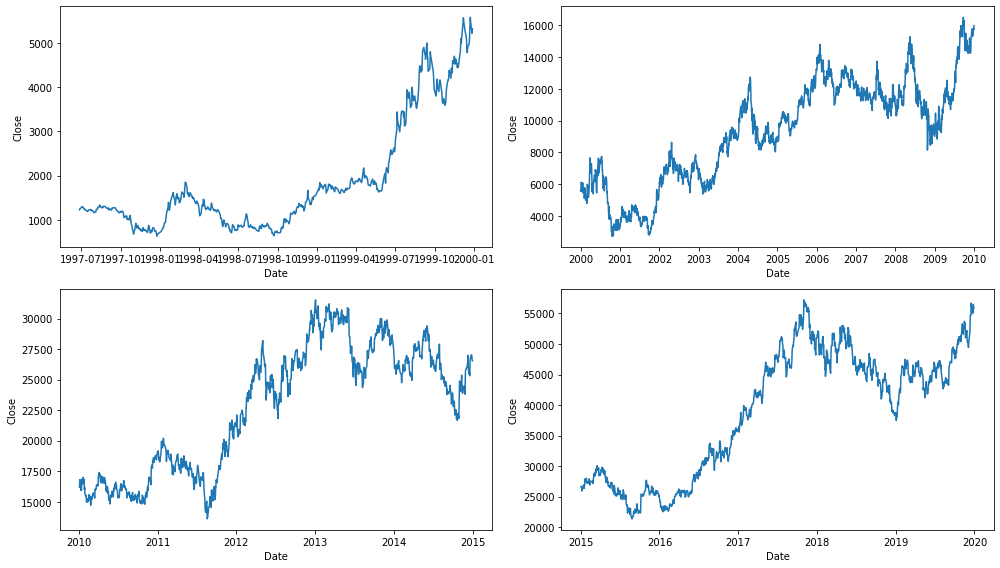

In [61]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(14,8)
for i in range(4) :
    ax = axes[i // 2 , i%2]
    df = stock.loc[(stock.index >= time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y = df['Close'], x = df.index, data = df, ax=ax)

plt.tight_layout()
plt.show()

### 시계열 데이터의 전처리

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scale을 적용할 column
scale_cols = ['Open','High', 'Low', 'Close', 'Volume']

In [64]:
scaled = scaler.fit_transform(stock[scale_cols])
df = pd.DataFrame(scaled, columns = scale_cols)
df.head()

,Open,High,Low,Close,Volume
0,0.013909,0.013068,0.012872,0.006606,0.001100
1,0.013588,0.012913,0.013676,0.006905,0.000406
2,0.013942,0.013326,0.014011,0.007004,0.001110
3,0.013942,0.013285,0.014067,0.007104,0.001859
4,0.014142,0.013564,0.014268,0.007403,0.001882


In [65]:
# train / test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Close'], axis=1), df['Close'], test_size = 0.2, random_state = 0, shuffle=False)

In [66]:
x_train.shape, x_test.shape

((4800, 4), (1200, 4))

In [67]:
y_train.shape, y_test.shape

((4800,), (1200,))

In [68]:
# 시퀀스 데이터셋 함수 구현

import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle) :
    series = tf.expand_dims(series, axis=-1) # 끝 방향으로 차원을 하나 늘려줌 
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift = 1, stride = 1, drop_remainder =True)
    ds = ds.flat_map(lambda w : w.batch(window_size +1))
    if shuffle :
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w : (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [69]:
window_size = 20
batch_size = 32

train_data = windowed_dataset(y_train, window_size, batch_size, True)
test_data = windowed_dataset(y_test, window_size, batch_size, False)

In [70]:
# x : (batch, window, feature)
# y : (batch, feature)
for data in train_data.take(1) :
    print(f'데이터셋 x 구성 (batch_size, window_size, feature 갯수 : {data[0].shape}')
    print(f'데이터셋 y 구성 (batch_size, window_size, feature 갯수 : {data[1].shape}')

데이터셋 x 구성 (batch_size, window_size, feature 갯수 : (32, 20, 1)
데이터셋 y 구성 (batch_size, window_size, feature 갯수 : (32, 1)


In [71]:
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.losses import Huber
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [72]:
model = Sequential([
                    Conv1D(filters=32, kernel_size = 5, 
                           padding = 'causal', 
                           activation = 'relu',
                           input_shape = [window_size, 1]),
                    LSTM(16),
                    Dense(16, activation = 'relu'),
                    Dense(1),
                    #Lambda(lambda x : x*20), 
]

)

In [73]:
loss = Huber() #MSE, MAE가 같이 임계값 내에 있으면 L2
earlystopping = EarlyStopping(monitor ='val_loss', patience = 10)
filename = 'tmp_checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath=filename,
                             save_best_only = True,
                             save_weights_only = True,
                             monitor = 'val_loss',
                             verbose = 1,)

In [74]:
model.compile(optimizer = 'adam', loss=loss, metrics = ['mae'])

In [75]:
model.fit(train_data, validation_data = (test_data),
          epochs = 50,
          callbacks = [earlystopping, checkpoint])

Epoch 1/50
150/150 [==============================] - 6s 19ms/step - loss: 5.7986e-05 - mae: 0.0073 - val_loss: 0.0044 - val_mae: 0.0717

Epoch 00001: val_loss improved from inf to 0.00439, saving model to tmp_checkpoint.ckpt
Epoch 2/50
150/150 [==============================] - 2s 13ms/step - loss: 1.2654e-05 - mae: 0.0038 - val_loss: 0.0033 - val_mae: 0.0597

Epoch 00002: val_loss improved from 0.00439 to 0.00331, saving model to tmp_checkpoint.ckpt
Epoch 3/50
150/150 [==============================] - 2s 13ms/step - loss: 1.1633e-05 - mae: 0.0036 - val_loss: 0.0027 - val_mae: 0.0537

Epoch 00003: val_loss improved from 0.00331 to 0.00272, saving model to tmp_checkpoint.ckpt
Epoch 4/50
150/150 [==============================] - 2s 13ms/step - loss: 1.0178e-05 - mae: 0.0033 - val_loss: 0.0020 - val_mae: 0.0452

Epoch 00004: val_loss improved from 0.00272 to 0.00200, saving model to tmp_checkpoint.ckpt
Epoch 5/50
150/150 [==============================] - 2s 13ms/step - loss: 1.0436e-0

In [76]:
model.load_weights(filename)

In [77]:
pred = model.predict(test_data)

In [78]:
pred

array([[0.34077966],
       [0.3366061 ],
       [0.33356613],
       ...,
       [0.8010126 ],
       [0.8003244 ],
       [0.7976212 ]], dtype=float32)

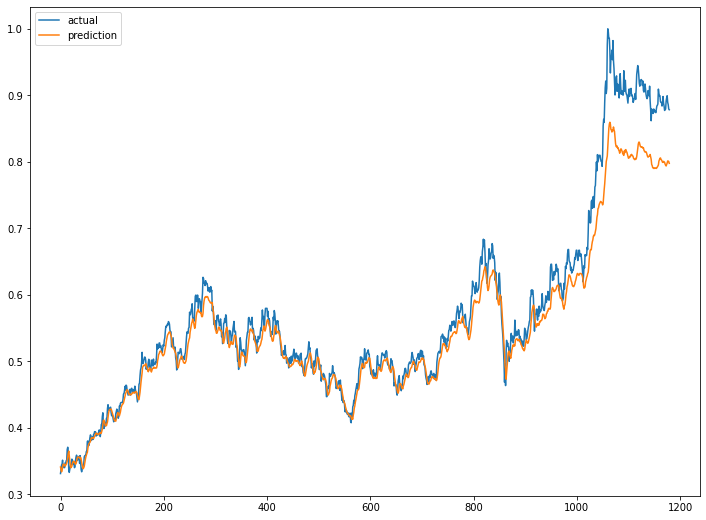

In [79]:
plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')

plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [178]:
# 마지막 부분이 조금 아쉽다. 
# lr을 조금 조정해보자
model = Sequential([
                    Conv1D(filters=32, kernel_size = 5, 
                           padding = 'causal', 
                           activation = 'relu',
                           input_shape = [window_size, 1]),
                    LSTM(16),
                    Dense(16, activation = 'relu'),
                    Dense(1),
                    #Lambda(lambda x : x*20), 
]

)
adam = Adam(learning_rate=0.005)
loss = Huber()
model.compile(optimizer=adam, loss=loss, metrics=['mae'])

In [179]:
model.fit(train_data, validation_data = (test_data),
          epochs = 50,
          callbacks = [earlystopping])

Epoch 1/50
150/150 [==============================] - 6s 21ms/step - loss: 7.3549e-05 - mae: 0.0078 - val_loss: 0.0025 - val_mae: 0.0476
Epoch 2/50
150/150 [==============================] - 2s 15ms/step - loss: 1.0211e-05 - mae: 0.0034 - val_loss: 0.0015 - val_mae: 0.0351
Epoch 3/50
150/150 [==============================] - 2s 15ms/step - loss: 1.0724e-05 - mae: 0.0034 - val_loss: 0.0012 - val_mae: 0.0298
Epoch 4/50
150/150 [==============================] - 3s 16ms/step - loss: 1.4471e-05 - mae: 0.0041 - val_loss: 0.0010 - val_mae: 0.0311
Epoch 5/50
150/150 [==============================] - 2s 15ms/step - loss: 8.7006e-06 - mae: 0.0031 - val_loss: 0.0013 - val_mae: 0.0392
Epoch 6/50
150/150 [==============================] - 2s 15ms/step - loss: 9.9756e-06 - mae: 0.0033 - val_loss: 7.0611e-04 - val_mae: 0.0268
Epoch 7/50
150/150 [==============================] - 2s 16ms/step - loss: 9.1362e-06 - mae: 0.0033 - val_loss: 5.1100e-04 - val_mae: 0.0223
Epoch 8/50
150/150 [=============

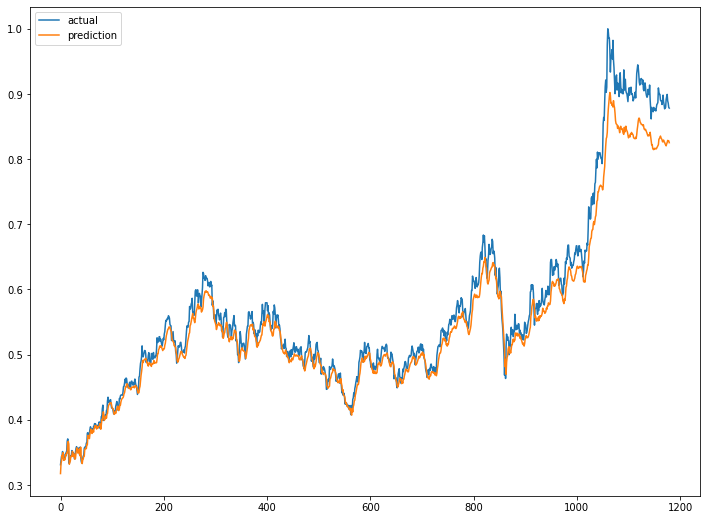

In [180]:
pred = model.predict(test_data)
plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')

plt.plot(pred, label='prediction')
plt.legend()
plt.show()